# Project: Investigate Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb). There are total of 20 columns in this dataset, variables including: budget, genres, title, popularity, release date, revenue, etc. 
There are many interesting things to explore in this dataset. One of the example is to first check if there's any correlations between vairables such as revenue and popularity level, another example is to explore which genre is most popular overall years, and lastly what attributes would affect the revenue of a movie. 

Question:

1. Most popular genre? Genre ranking
2. What is the distribution of popularity?
3. What is the distribution of revenue?
4. What variables are potentially correlated with revenue?
5. Revenue trend overtime?

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
import scipy
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('tmdb_5000_movies.csv')
df1 = pd.read_csv('tmdb_5000_credits.csv')

<a id='wrangling'></a>
## Data Wrangling


In [34]:
# combine two tables
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [35]:
#check columns name
df1.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [109]:
# Display final table
df1 = df1.rename(columns={'movie_id':'id'})
final = df.merge(df1,on='id')
final.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [110]:
#check na
final.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [111]:
#drop unnecessary columns
final1 = final.drop(columns = ['homepage','original_title','overview','production_companies','production_countries',
                      'spoken_languages','tagline','keywords','original_language',
                      'title_y','title_x','cast','crew'])

In [85]:
final1.head(2)

,budget,genres,id,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,2009-12-10,2787965087,162.0,Released,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,2007-05-19,961000000,169.0,Released,6.9,4500


In [86]:
#check datatypes
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4803 non-null   int64  
 1   genres        4803 non-null   object 
 2   id            4803 non-null   int64  
 3   popularity    4803 non-null   float64
 4   release_date  4802 non-null   object 
 5   revenue       4803 non-null   int64  
 6   runtime       4801 non-null   float64
 7   status        4803 non-null   object 
 8   vote_average  4803 non-null   float64
 9   vote_count    4803 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 412.8+ KB


### Convert Data Types

In [112]:
# release_date is not correct datetime format & status should be categorical
final1['release_date'] = pd.to_datetime(final1['release_date'])
final1['status'] = final1['status'].astype('category')

In [101]:
final1.dtypes

budget                   int64
genres                  object
id                       int64
popularity             float64
release_date    datetime64[ns]
revenue                  int64
runtime                float64
status                category
vote_average           float64
vote_count               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### 1: Most popular genre? Genre ranking

In [113]:
#clean genres column
final1['genres'] = final1['genres'].str.replace('"',"")
final1['genres'] = final1['genres'].str.replace('{',"")
final1['genres'] = final1['genres'].str.replace('}',"")
final1['genres'] = final1['genres'].str.replace('id:',"")
final1['genres'] = final1['genres'].str.replace('name:',"")
final1['genres'] = final1['genres'].str.replace('[0-9]',"",regex = True)
# final1['genres'] = final1['genres'].str.replace(','," ",regex = True)
final1['genres'] = final1['genres'].str.replace('['," ",regex = True)
final1['genres'] = final1['genres'].str.replace(']'," ",regex = True)

<ipython-input-113-3a42d1647794>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  final1['genres'] = final1['genres'].str.replace('{',"")
<ipython-input-113-3a42d1647794>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  final1['genres'] = final1['genres'].str.replace('}',"")


In [185]:
#split one columns with multiple genres in to multiple columns with single genre
a = final1['genres'].str.split(r" ,  ",expand=True)

In [186]:
# all avaliable genres
a = a.replace(',',"",regex = True)
a = a.replace(' ',"",regex = True)
a

,0,1,2,3,4,5,6,7
0,,Action,Adventure,Fantasy,ScienceFiction,None,None,None
1,,Adventure,Fantasy,Action,None,None,None,None
2,,Action,Adventure,Crime,None,None,None,None
3,,Action,Crime,Drama,Thriller,None,None,None
4,,Action,Adventure,ScienceFiction,None,None,None,None
...,...,...,...,...,...,...,...,...
4798,,Action,Crime,Thriller,None,None,None,None
4799,,Comedy,Romance,None,None,None,None,None
4800,,Comedy,Drama,Romance,TVMovie,None,None,None
4801,,None,None,None,None,None,None,None


In [187]:
#append all columns in to single column, this column will record all genre for all movies, drop null values
genre = a[1].append(a[2]).append(a[3]).append(a[4]).append(a[5]).append(a[6]).append(a[7]).reset_index(drop=True)
genre = pd.DataFrame(genre)

In [188]:
#clean the table, group by genre, count number of each genre
genre = genre.reset_index(drop = True)
genre = genre.dropna()
genre.columns = ['genre']
genre

,genre
0,Action
1,Adventure
2,Action
3,Action
4,Action
...,...
28064,Music
30643,ScienceFiction
31164,Thriller
31499,Romance


In [189]:
genre.genre.unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'ScienceFiction',
       'Drama', 'Thriller', 'Family', 'Comedy', 'History', 'War',
       'Western', 'Romance', 'Crime', 'Mystery', 'Horror', 'Documentary',
       'Music', 'TVMovie', 'Foreign'], dtype=object)

<AxesSubplot:title={'center':'Genre Ranking'}, xlabel='Genre', ylabel='Count'>

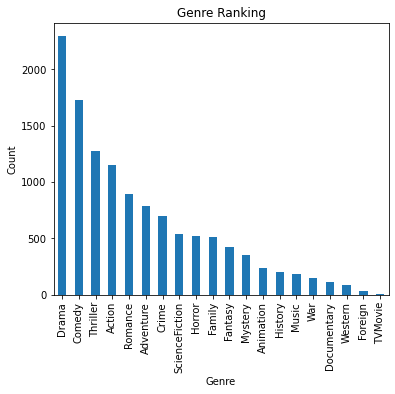

In [195]:
#plot and sort by num of genre 
groupby = genre.groupby(['genre']).size().sort_values(ascending=False)
groupby.plot(kind='bar', title='Genre Ranking', ylabel='Count',
         xlabel='Genre', figsize=(6, 5))

###  2: What is the distribution of popularity?

In [196]:
final1.head(2)

,budget,genres,id,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,", Action, , Adventure, , Fantasy, , S...",19995,150.437577,2009-12-10,2787965087,162.0,Released,7.2,11800
1,300000000,", Adventure, , Fantasy, , Action",285,139.082615,2007-05-19,961000000,169.0,Released,6.9,4500


/Users/rebecca/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Popularity Boxplot')

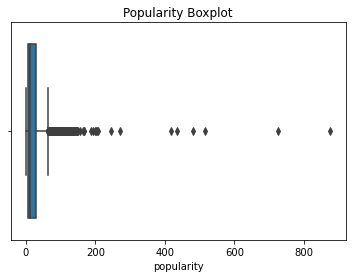

In [219]:
# plot boxplot
sns.boxplot(final1['popularity'])
plt.title('Popularity Boxplot')

### 3: What is the distribution of revenue?

Text(0.5, 1.0, 'Revenue Distribution')

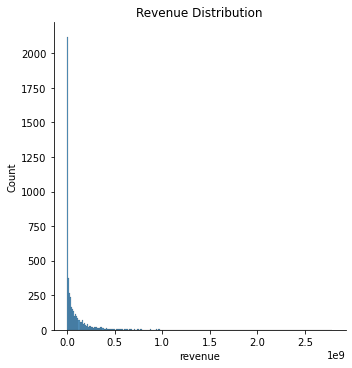

In [220]:
#plot line chart
sns.displot(final1['revenue'])
plt.title('Revenue Distribution')

/Users/rebecca/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Revenue Boxplot')

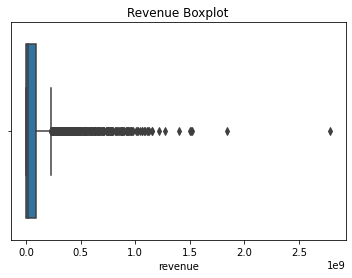

In [221]:
#plot boxplot
sns.boxplot(final1['revenue'])
plt.title('Revenue Boxplot')

### 4: What variables are potentially correlated with revenue?

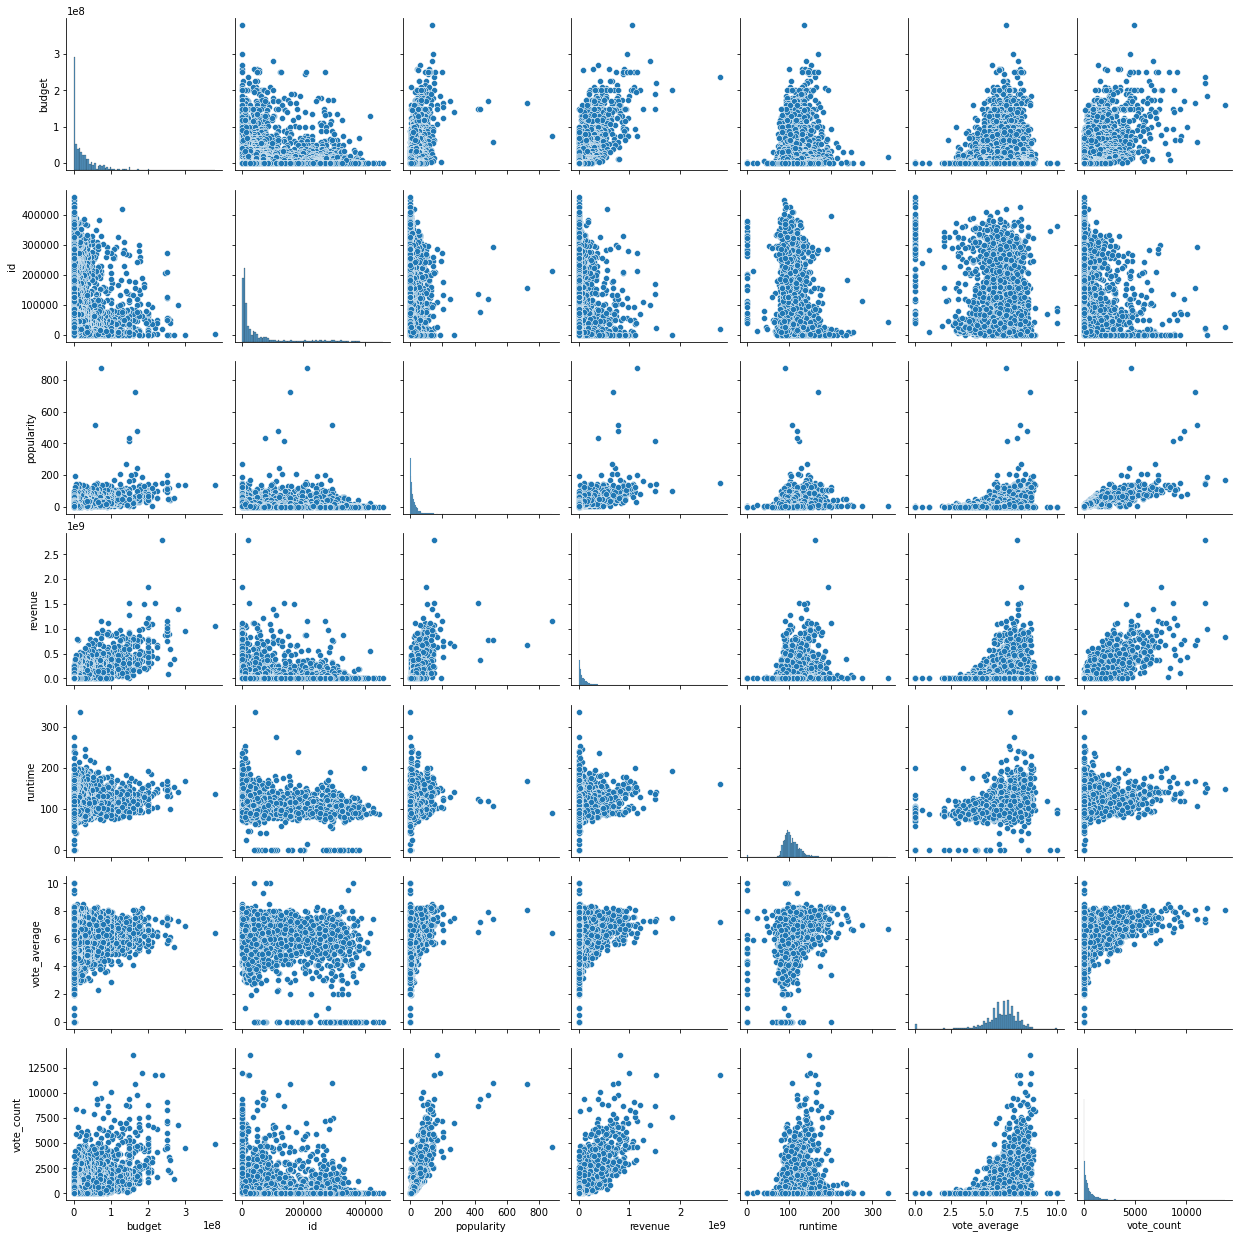

In [223]:
# correlation matrix
sns.pairplot(final1)

In [215]:
#calculate correlation between revenue and vote_count
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr

corr, _ = spearmanr(final1['vote_count'], final1['revenue'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.804


In [216]:
#calculate correlation between revenue and budget
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr

corr, _ = spearmanr(final1['budget'], final1['revenue'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.757


### 5: Revenue trend overtime?

In [197]:
# only keep release_date and revenue columns
revenue = final1[['release_date','revenue']]
revenue.head()

,release_date,revenue
0,2009-12-10,2787965087
1,2007-05-19,961000000
2,2015-10-26,880674609
3,2012-07-16,1084939099
4,2012-03-07,284139100


In [207]:
# group. revenue by release date(year-month) and sum up all revenue
revenue.groupby([revenue['release_date'].dt.strftime('%Y-%m')]).sum()

,revenue
release_date,
1916-09,8394751
1925-11,22000000
1927-01,650422
1929-01,0
1929-02,4358000
...,...
2016-07,1533044080
2016-08,982756649
2016-09,15861566


Text(0, 0.5, 'Revenue (1,000,000,000)')

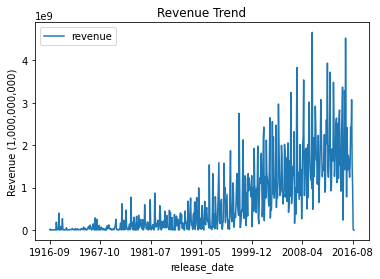

In [226]:
#plot the total revenue trend over-time
revenue.groupby([revenue['release_date'].dt.strftime('%Y-%m')]).sum().plot(legend='True')
plt.title('Revenue Trend')
plt.ylabel('Revenue (1,000,000,000)')

<a id='conclusions'></a>
## Conclusions

Insights + Limitations

1. Genre Ranking

By grouping the genres and count the number of movies per genre, we can see that 'Drama' and 'Comedy' are the TOP 2 genres among all movie types. People don't enjoy 'TV Movie' that much compares to other genres. Some limitation with this estimation is that is doesn't show trend overtime, since some genres might be popular in previous years but more 'Drama' movies were released in recent years.

2. Popularity Distribution

By looking at the boxplot, we can see that the popularity score is highly unbalanced. There are many outliers which need to be dealing with when performing regression analysis or other predictive modeling. 

3. Revenue Distribution

From the bar graph, the revenue column is also highly left skewed, there are lots of outliers in the dataset. Consider using log transformation or drop some of the outliers before preceeding to other steps might be more efficient. 

4. Correlation Matrix - Revenue

The correlation matrix shows the relationship between each pairs of variables. By looking at each plot between revenue and other variables, we can see that 'revenue' is likely correlated with 'vote_count' and 'budget'. It's not difficult to relate these variables since higher budget tends to allow higher quality of production team and better production of the movie, turns out the Spearmans Correlation score is 0.804. Moreover, a higher vote_count means the level of people who enjoyed watching that movie, hence, it can be correlated with 'revenue' since more people vote for it, turns out the Spearmans Correlation score is 0.757. 

5. Revenue Trend

By grouping the year-month and sum up the revenue of each movie, we can see from the line chart that the total revenue of the movie industry is growing in a upward trend. It's not growing at a constant rate and it's pretty volatile compare to other industry but overall it's still giving people a positive sign. 